In [ ]:
### Soru 1 : 
## Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)
states = pd.read_csv("C:/Users/neslihan.kumbasar/bootcamp/states_all_new.csv", index_col=0)
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859713
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067


In [23]:
states["WINSORIZE_TOTAL_REVENUE"]= winsorize(states["TOTAL_REVENUE"], (0,0.10))
states["WINSORIZE_FEDERAL_REVENUE"]= winsorize(states["FEDERAL_REVENUE"], (0,0.10))
states["WINSORIZE_STATE_REVENUE"]= winsorize(states["STATE_REVENUE"], (0,0.10))

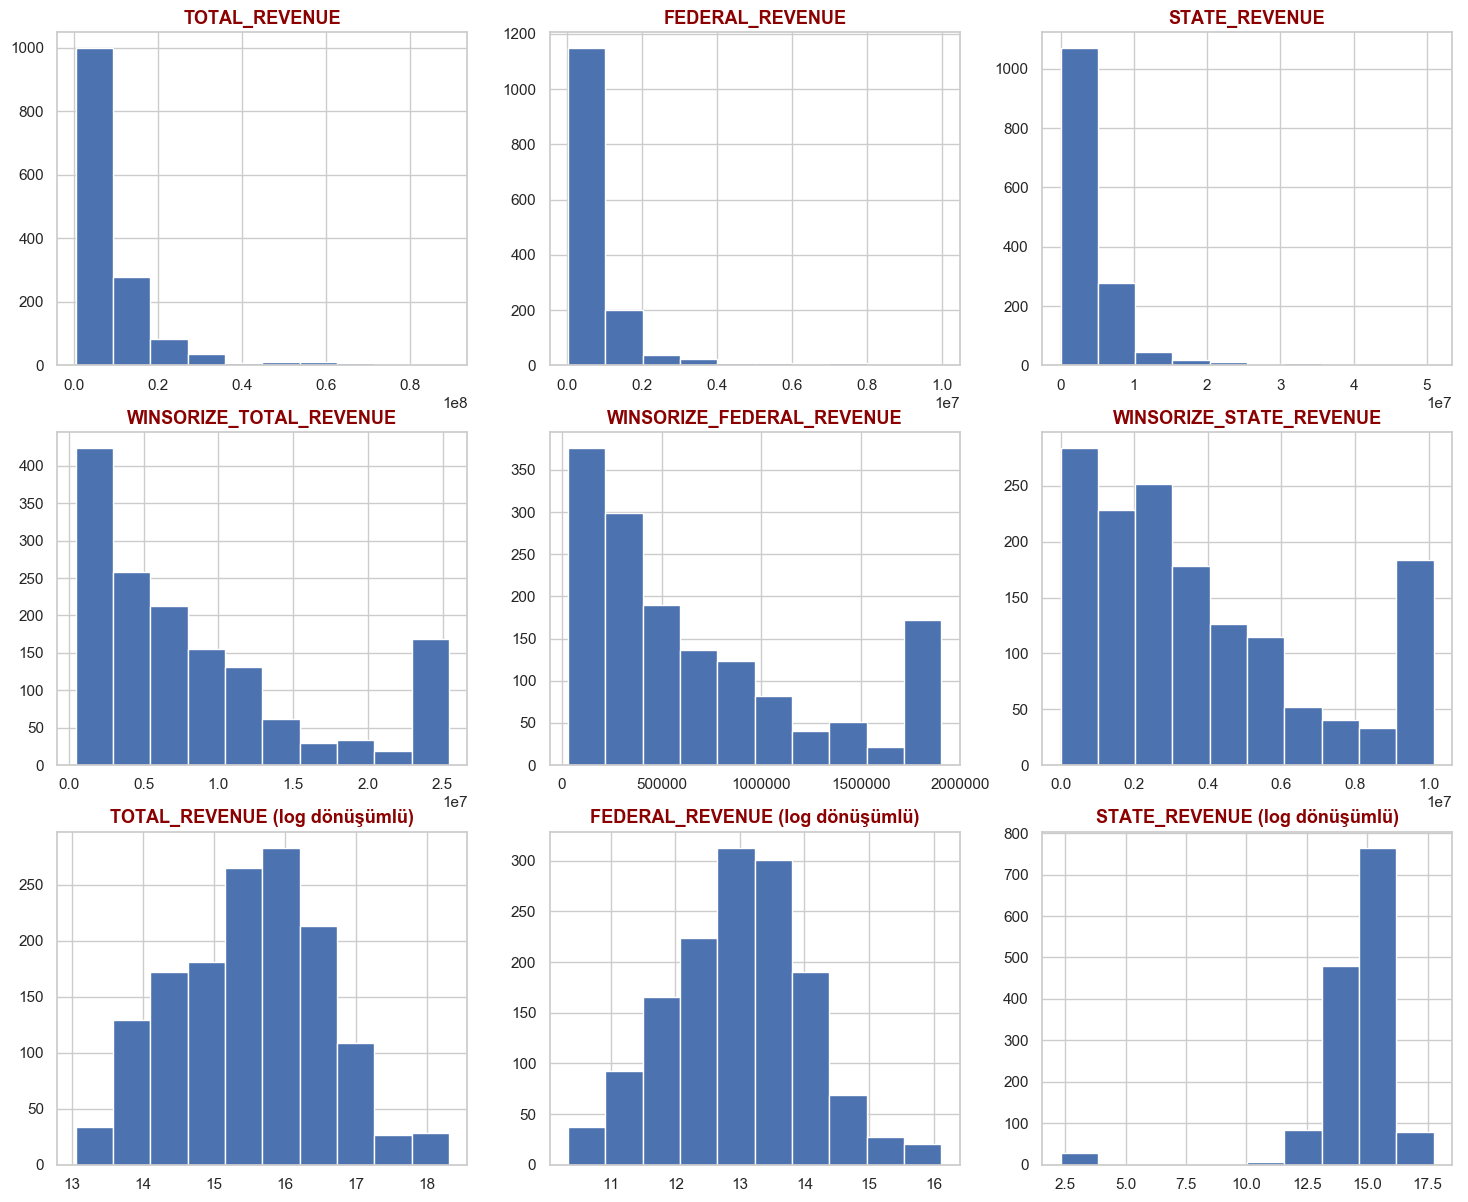

In [24]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['TOTAL_REVENUE', 'FEDERAL_REVENUE' , 'STATE_REVENUE']
winsorize_degiskenler = ['WINSORIZE_TOTAL_REVENUE', 'WINSORIZE_FEDERAL_REVENUE', 'WINSORIZE_STATE_REVENUE']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(states[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(states[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i], fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3, 3, i+7)
    plt.hist(np.log(states[degiskenler[i]]))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)
    
    
### Daha onceden null olan degerleri yillara gore gruplayarak doldurdugumuz "states_all_new" dosyasi ile calisma yapildi.
### Dosyanin ilk hali ve winsorize edildigi halde hala aykiri degerlerin oldugunu gozlemleyebiliyoruz.
## Log donusumu sayesinde normale yakin grafikler elde edilmistir.

In [25]:
### Soru 2 :
## Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. 
## Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

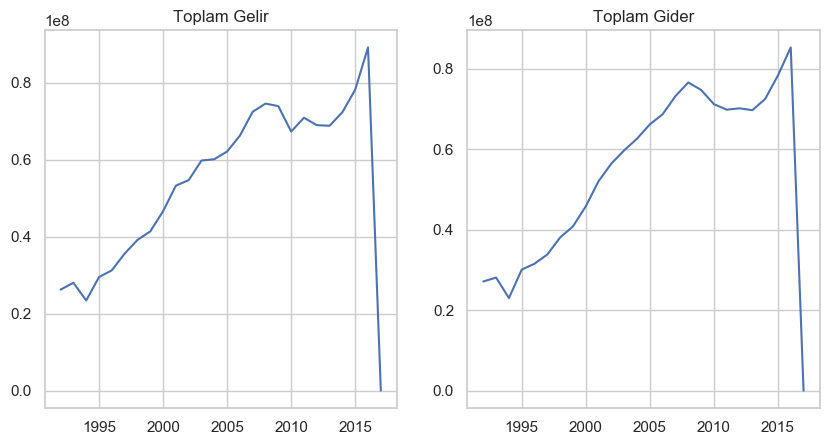

In [26]:
states=states[states["STATE"]=='CALIFORNIA']
TOTAL_REVENUE_YEARLY=states.groupby("YEAR")["TOTAL_REVENUE"].sum()
TOTAL_EXPENDITURE_YEARLY=states.groupby("YEAR")["TOTAL_EXPENDITURE"].sum()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(TOTAL_REVENUE_YEARLY)
plt.title("Toplam Gelir")
plt.subplot(1,2,2)
plt.plot(TOTAL_EXPENDITURE_YEARLY)
plt.title("Toplam Gider")
plt.show()

### CALIFORNIA bazinda toplam gelir ve giderlerin yillara gore paralel degistigini rahatlikla gorebiliyoruz.
### 1994 yillarinda en dusuk degerleri gorurken , 2016 yilinda gelir/gider degerleri zirveyi gormustur.

In [27]:
### Soru 3 :
## Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

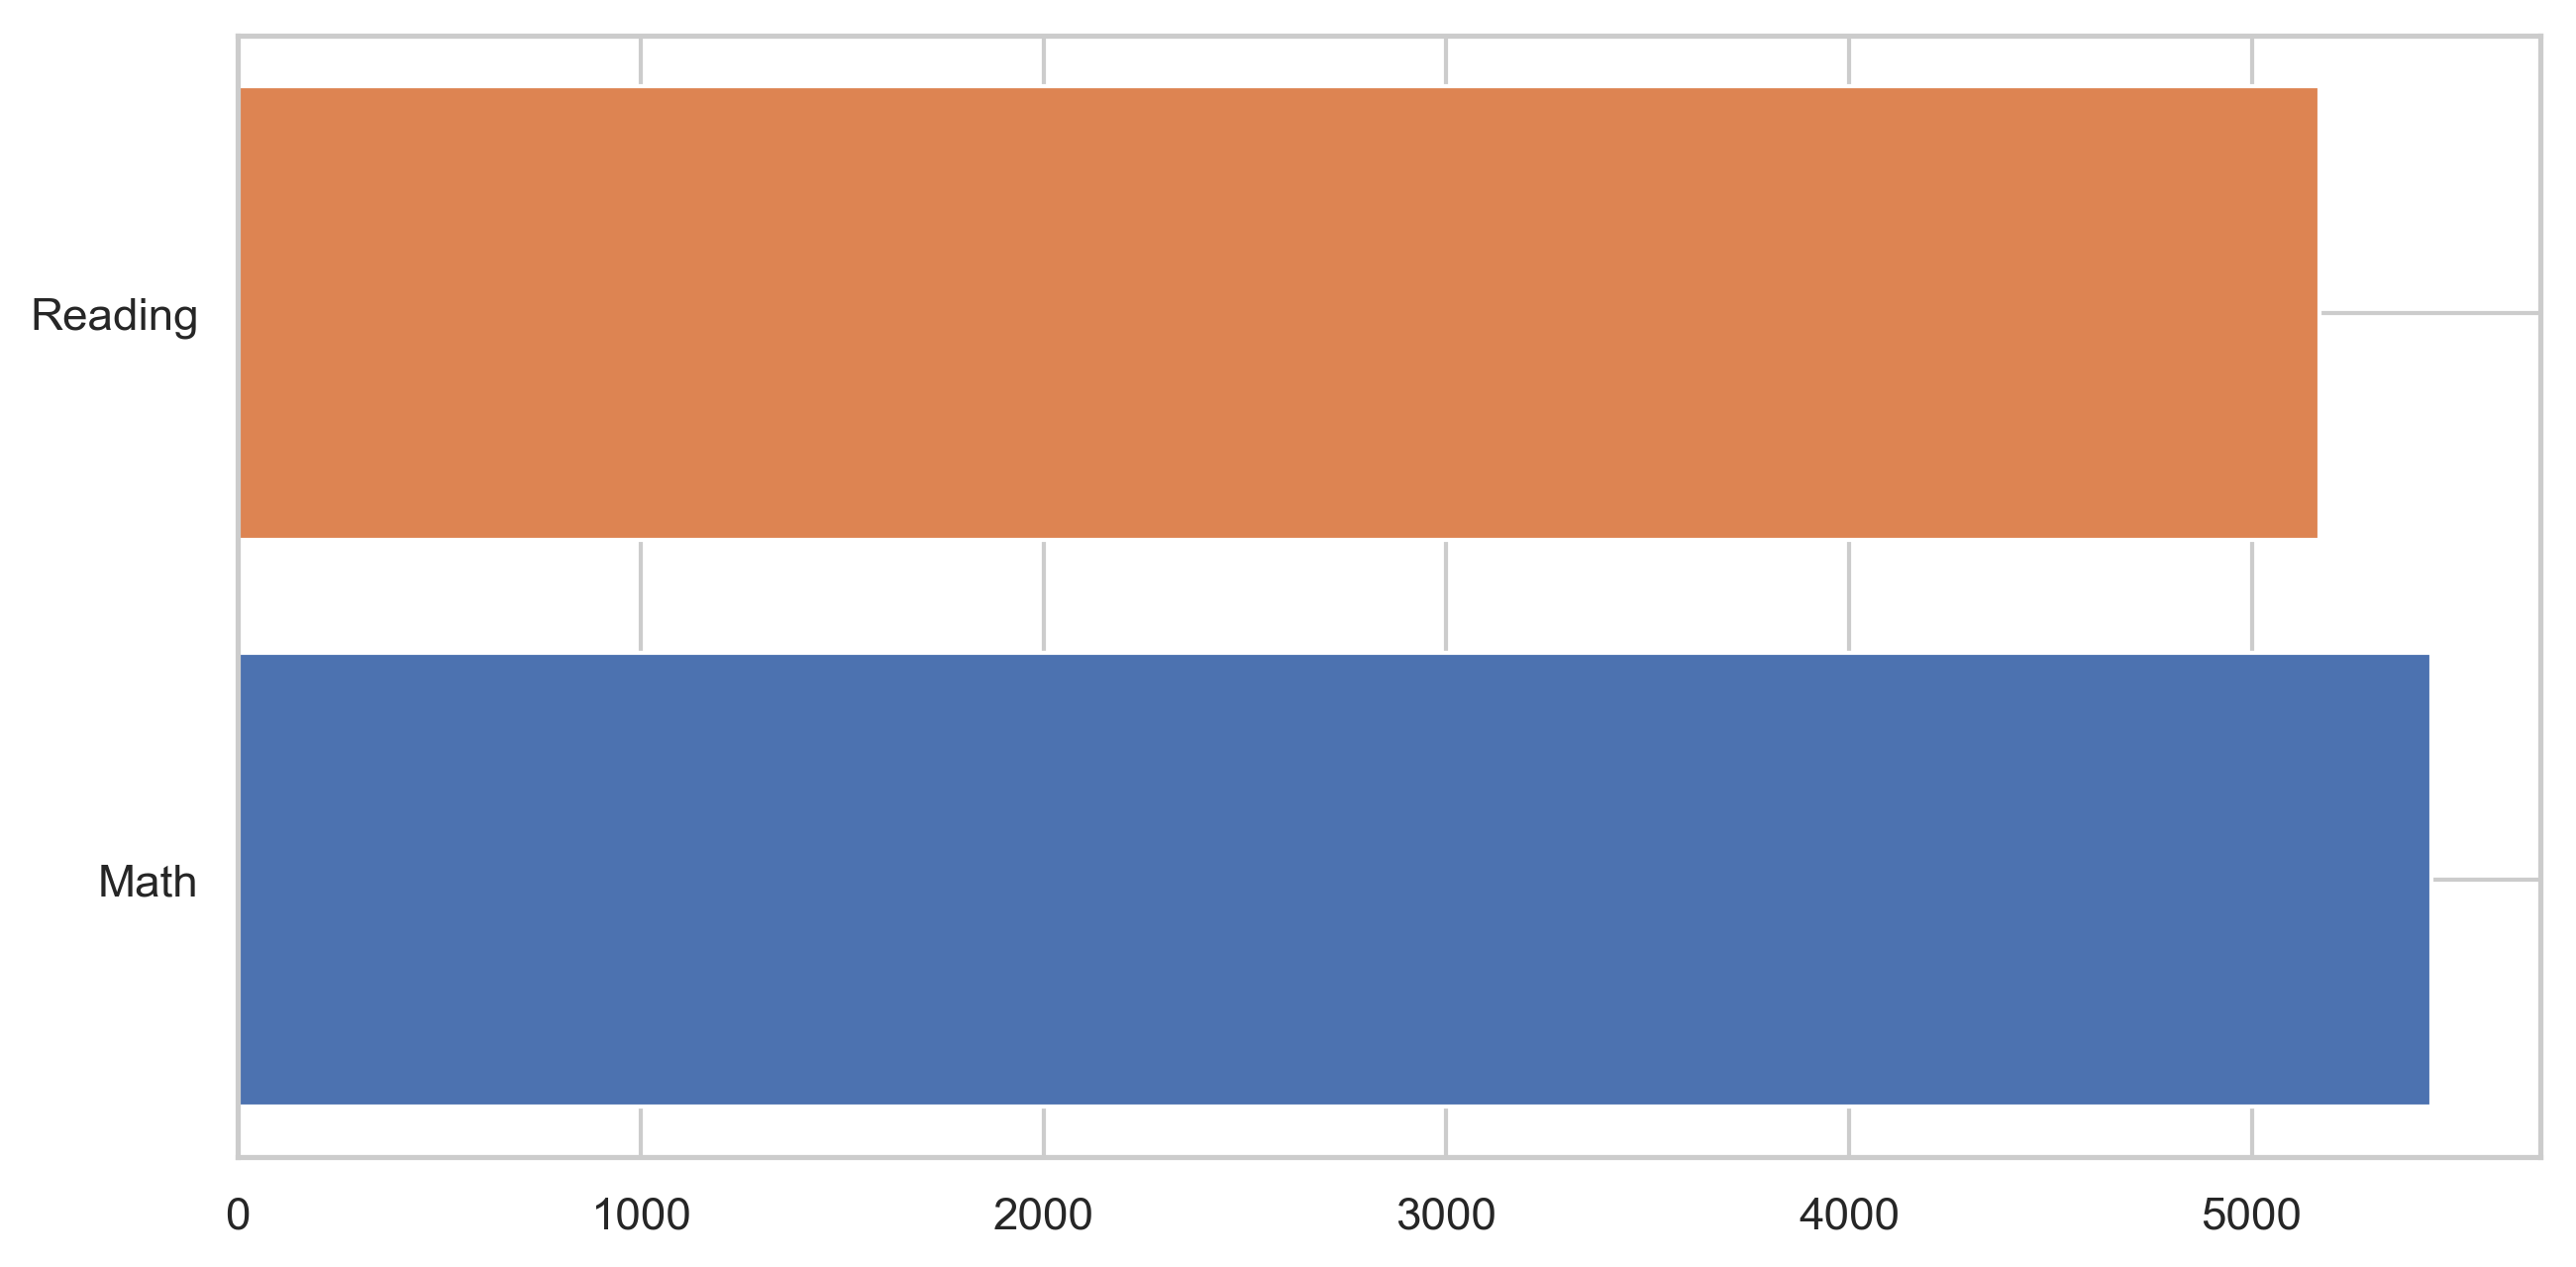

In [28]:
math=states["AVG_MATH_4_SCORE"]+states["AVG_MATH_8_SCORE"]
reading= states["AVG_READING_4_SCORE"]+states["AVG_READING_8_SCORE"]

plt.figure(figsize=(10,5) ,dpi=300)
plt.barh("Math", math.sum())
plt.barh("Reading", reading.sum())
plt.show()

### Elimizdeki verieli toplayarak MAth ve Reading olarak 2 deger cikarip bunlarin kiyalamasini yaptim.
## Matematik dersindeki basarinin daha yuksek oldugunu goruyoruz

In [29]:
### Soru 4 : 
## Matematik ve okuma notlarının dağılımı nedir?

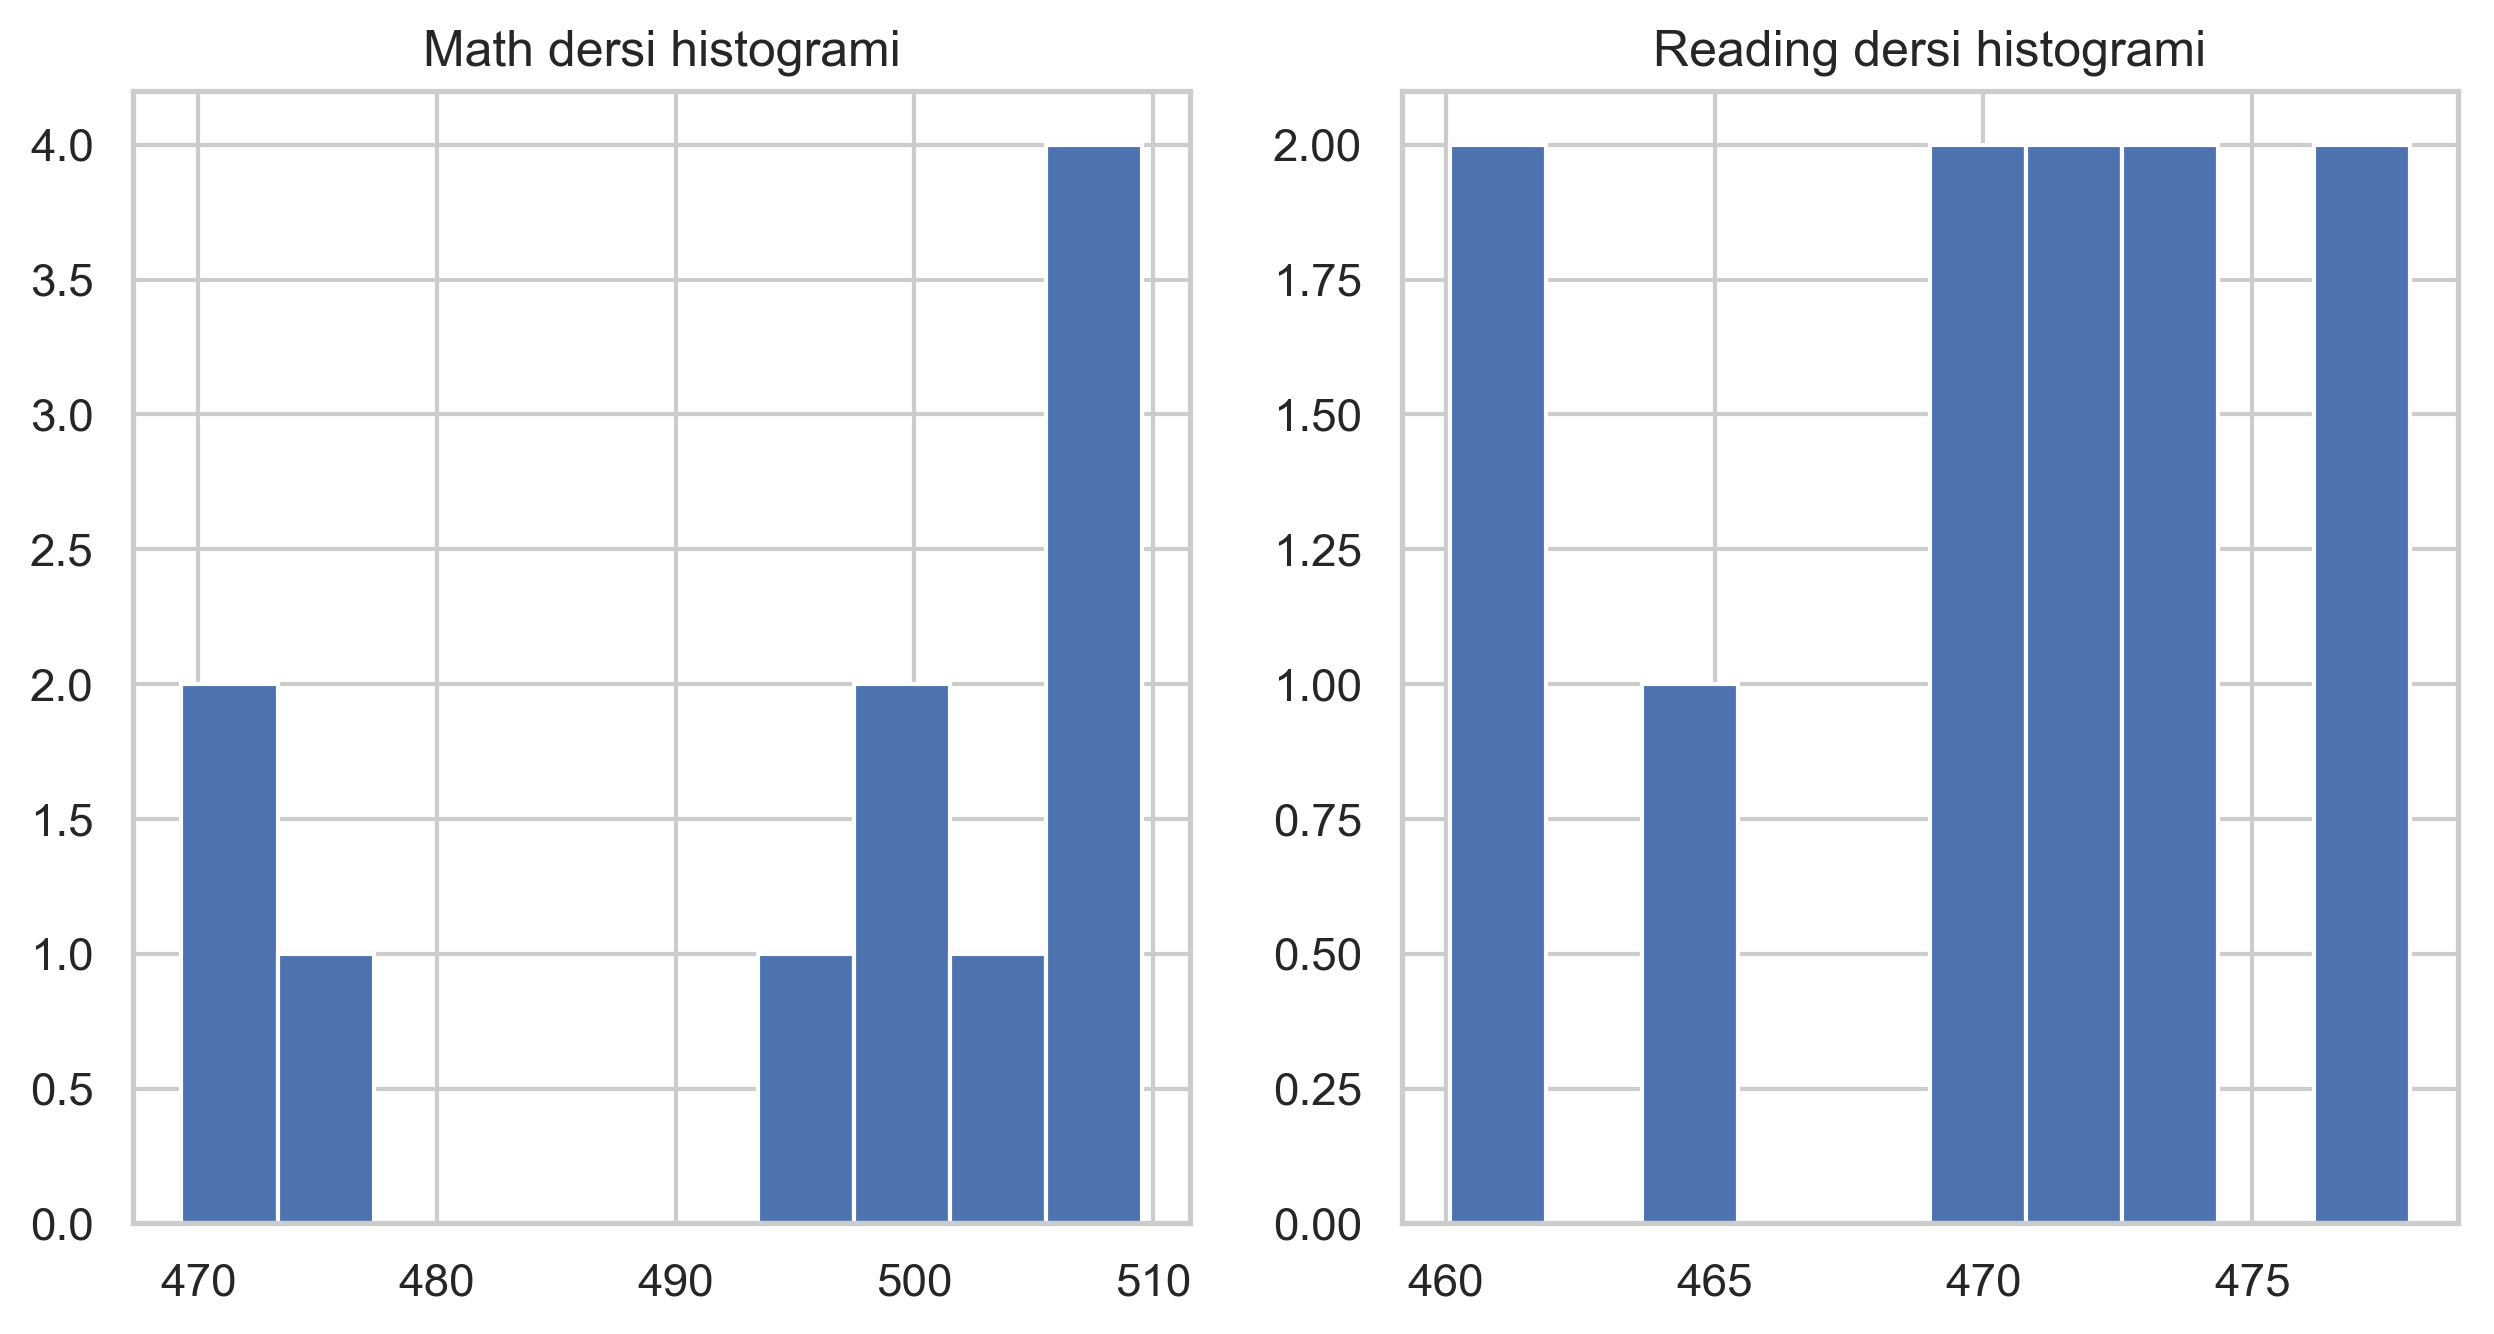

In [30]:
plt.figure(figsize=(10,5) ,dpi=300)
plt.subplot(1,2,1)
plt.hist(math)
plt.title("Math dersi histogrami")
plt.subplot(1,2,2)
plt.hist(reading)
plt.title("Reading dersi histogrami")
plt.show()

## Aykiri degerlerin yine oldugunu gorebiliyoruz.

In [41]:
### soru 5 :
## Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. 
## Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. 
## Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

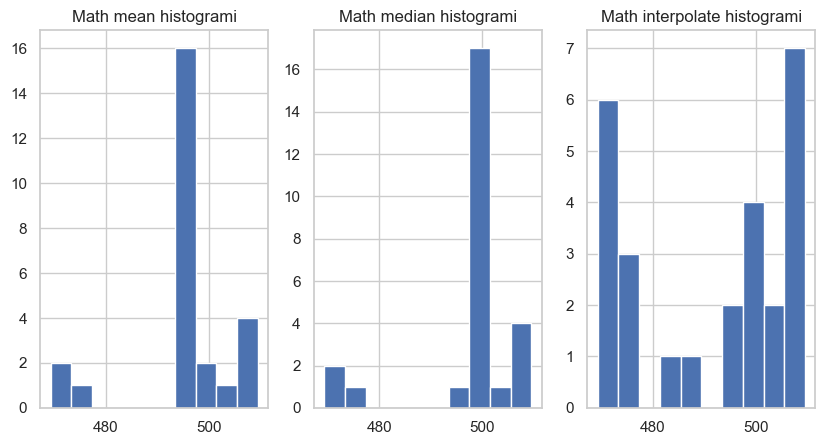

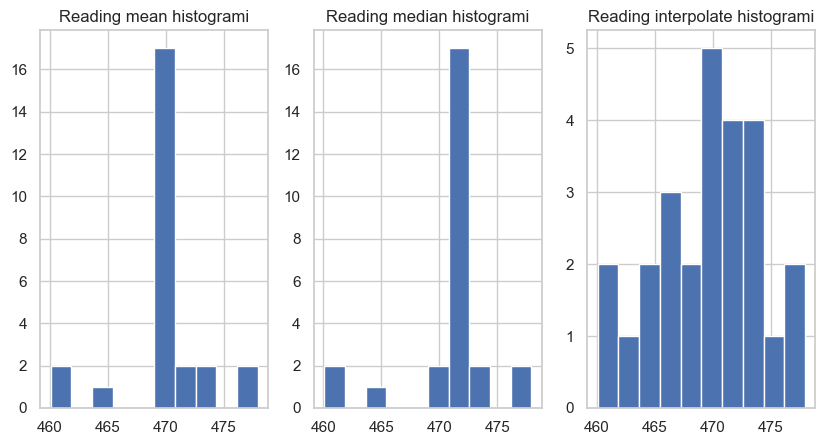

In [51]:
math_mean=math.fillna(math.mean())
reading_mean=reading.fillna(reading.mean())

math_median=math.fillna(math.median())
reading_median=reading.fillna(reading.median())

math_interpolate=math.fillna(math.interpolate())
reading_interpolate=reading.fillna(reading.interpolate())

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.hist(math_mean)
plt.title("Math mean histogrami")
plt.subplot(1,3,2)
plt.hist(math_median)
plt.title("Math median histogrami")
plt.subplot(1,3,3)
plt.hist(math_interpolate)
plt.title("Math interpolate histogrami")
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.hist(reading_mean)
plt.title("Reading mean histogrami")
plt.subplot(1,3,2)
plt.hist(reading_median)
plt.title("Reading median histogrami")
plt.subplot(1,3,3)
plt.hist(reading_interpolate)
plt.title("Reading interpolate histogrami")
plt.show()

### Interpolate islemi gormus garfiklerin normale biraz daha yaklastigini gorebiliyoruz.